In [1]:
import os, math
from slicing_inference import sahi_slicing_inference
from inference_modular import ship_detection, ship_detection_bulk
from PIL import Image 
import numpy as np
from imageutils import resize_img
import torch

D:\NLP 1\venv\Lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
D:\NLP 1\venv\Lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pyto

In [4]:
image_path=r"D:\NLP 1\Sat_object_detection\debug_images\2.jpg"
image_path=r"D:\NLP 1\Sat_object_detection\inference_images\dd4ffcb5c.jpg"

image = Image.open(image_path).convert("RGB")

# model = torch.load('models/best_model.pth', map_location = 'cuda')

In [5]:
bbox_coord = [53.996172, 16.951560, 54.010077, 16.963793]
result = ship_detection_sahi(image=image, bbox_coord_wgs84=bbox_coord)

NameError: name 'ship_detection_sahi' is not defined

In [ ]:
result
# result['prediction'].export_visuals(export_dir="demo_data/", hide_labels=True,)

{'res_object': <sahi.prediction.PredictionResult at 0x22e7fd434d0>,
 'n_obj': 3,
 'bboxes': array([[ 73.13797 , 639.82117 , 124.770706, 741.1826  ],
        [ 37.490547, 137.97885 ,  99.83393 , 229.94489 ],
        [579.8303  , 552.79254 , 610.90784 , 606.02045 ]], dtype=float32),
 'scores': array([0.99949455, 0.9990532 , 0.99712497], dtype=float32),
 'sahi_scaled_down_image': <PIL.Image.Image image mode=RGB size=768x768>,
 'ships_coord': [(53.997963614676, 16.962558580268),
  (53.997415162024, 16.95449021554),
  (54.006951436265, 16.960789009952)],
 'ships_length': [205.2, 202.4, 111.7],
 'ships_bbox_dimensions': [(179.5, 99.4), (162.9, 120.1), (94.3, 59.8)]}

In [ ]:
import os
path = r"D:\NLP 1\Sat_object_detection\inference_images"
# raw_path = r"{0}".format(path)
# path.encode()
# os.path.exists(path)

In [ ]:
image_ext = ('.jpg','.jpeg', '.png', '.jp2', '.jfif', '.pjpeg', '.webp', '.tiff', '.tif')
filename = r"D:\NLP1\Sat_object_detection\inference_images\fsdf.png"
# filename = fr"{filename}"
filename.endswith(image_ext)

True

In [ ]:
mask_filename = "{}_pred{}".format(os.path.splitext(filename)[0], os.path.splitext(filename)[1])
mask_filename

'D:\\NLP1\\Sat_object_detection\\inference_images\\fsdf_pred.png'

In [ ]:
size = os.path.getsize(r"D:\NLP 1\Sat_object_detection\debug_images\2.jpg")
size

1262285

In [ ]:
stat = os.stat(r"D:\NLP 1\Sat_object_detection\debug_images\2.jpg")
stat.st_size


1262285

In [ ]:
from exifread import process_file
def get_image_dimensions(file_path):
    with open(file_path, 'rb') as f:
        tags = process_file(f, details=True)
        return tags

In [ ]:
image_path = r"D:\NLP 1\Sat_object_detection\inference_images\2.jpg"
d = get_image_dimensions(image_path)
d

NameError: name 'get_image_dimensions' is not defined

In [ ]:
from get_image_size import *

In [ ]:
from PIL import Image
from time import time

t1 = time()
counter = 0
images_data = []
images_dir = r"D:\NLP 1\Sat_object_detection\inference_images"
# images_dir = r"D:\NLP 1\Sat_object_detection\large_images"
image_ext = ('.jpg','.jpeg', '.png', '.jp2', '.jfif', '.pjpeg', '.webp', '.tiff', '.tif')
for filename in os.listdir(images_dir):
    if filename.endswith(image_ext):
        # print(filename)
        img = filename
        img_mask = "{}_pred{}".format(os.path.splitext(filename)[0], os.path.splitext(filename)[1])
        img_size = Image.open(os.path.join(images_dir, filename)).size
        images_data.append([img, img_mask, img_size])
        counter += 1
print(counter)
print(images_data)

model_input_dim = 768
for img in images_data:
    w, h = img[2]
    p = (w * h) // (model_input_dim * model_input_dim)
    if p > 10:
        img_sahi_scale_down_factor = int(round(math.sqrt(p / 20), 0))
    else:
        img_sahi_scale_down_factor = 1
    img.append(img_sahi_scale_down_factor)
print(images_data)

organized_images_by_scale_down_factor = {}
for sublist in images_data:
    last_element = sublist[-1]
    if last_element not in organized_images_by_scale_down_factor:
        organized_images_by_scale_down_factor[last_element] = []
    organized_images_by_scale_down_factor[last_element].append(sublist)

print(organized_images_by_scale_down_factor)
print(f"{time()-t1:.4f}")

132
[['011409565.jpg', '011409565_pred.jpg', (768, 768)], ['012473874.jpg', '012473874_pred.jpg', (768, 768)], ['01f13f599.jpg', '01f13f599_pred.jpg', (768, 768)], ['032610514.jpg', '032610514_pred.jpg', (768, 768)], ['037367901.jpg', '037367901_pred.jpg', (768, 768)], ['03a75a583.jpg', '03a75a583_pred.jpg', (768, 768)], ['041409351.jpg', '041409351_pred.jpg', (768, 768)], ['058358044.jpg', '058358044_pred.jpg', (768, 768)], ['065080198.jpg', '065080198_pred.jpg', (768, 768)], ['078464555.jpg', '078464555_pred.jpg', (768, 768)], ['08229754b.jpg', '08229754b_pred.jpg', (768, 768)], ['084269309.jpg', '084269309_pred.jpg', (768, 768)], ['0aba8fa6f.jpg', '0aba8fa6f_pred.jpg', (768, 768)], ['0b7359c38.jpg', '0b7359c38_pred.jpg', (768, 768)], ['0c0d90d8d.jpg', '0c0d90d8d_pred.jpg', (768, 768)], ['0c24ec954.jpg', '0c24ec954_pred.jpg', (768, 768)], ['0e40b3a5b.jpg', '0e40b3a5b_pred.jpg', (768, 768)], ['0ec10921f.jpg', '0ec10921f_pred.jpg', (768, 768)], ['1.jpg', '1_pred.jpg', (2000, 1467)], ['

In [ ]:
for i in organized_images_by_scale_down_factor.keys():
    print(i)

1
2


In [ ]:
model_input_dim = 768
for img in images_data:
    w, h = img[2]
    p = (w * h) // (model_input_dim * model_input_dim)
    if p > 10:
        img_sahi_scale_down_factor = int(round(math.sqrt(p / 20), 0))
    else:
        img_sahi_scale_down_factor = 1
    img.append(img_sahi_scale_down_factor)
print(images_data)

[['011409565.jpg', '011409565_pred.jpg', (768, 768), 1, 1], ['012473874.jpg', '012473874_pred.jpg', (768, 768), 1, 1], ['01f13f599.jpg', '01f13f599_pred.jpg', (768, 768), 1, 1], ['032610514.jpg', '032610514_pred.jpg', (768, 768), 1, 1], ['037367901.jpg', '037367901_pred.jpg', (768, 768), 1, 1], ['03a75a583.jpg', '03a75a583_pred.jpg', (768, 768), 1, 1], ['041409351.jpg', '041409351_pred.jpg', (768, 768), 1, 1], ['058358044.jpg', '058358044_pred.jpg', (768, 768), 1, 1], ['065080198.jpg', '065080198_pred.jpg', (768, 768), 1, 1], ['078464555.jpg', '078464555_pred.jpg', (768, 768), 1, 1], ['08229754b.jpg', '08229754b_pred.jpg', (768, 768), 1, 1], ['084269309.jpg', '084269309_pred.jpg', (768, 768), 1, 1], ['0aba8fa6f.jpg', '0aba8fa6f_pred.jpg', (768, 768), 1, 1], ['0b7359c38.jpg', '0b7359c38_pred.jpg', (768, 768), 1, 1], ['0c0d90d8d.jpg', '0c0d90d8d_pred.jpg', (768, 768), 1, 1], ['0c24ec954.jpg', '0c24ec954_pred.jpg', (768, 768), 1, 1], ['0e40b3a5b.jpg', '0e40b3a5b_pred.jpg', (768, 768), 1, 

In [ ]:
for img in images_data:
    if img[3] != 1:
        print(img)

['2.jpg', '2_pred.jpg', (8313, 5513), 2]
['2_1.jpg', '2_1_pred.jpg', (5513, 5513), 2]


In [ ]:
organized_images_by_scale_down_factor = {}
for sublist in images_data:
    last_element = sublist[-1]
    if last_element not in organized_images_by_scale_down_factor:
        organized_images_by_scale_down_factor[last_element] = []
    organized_images_by_scale_down_factor[last_element].append(sublist)

In [ ]:
organized_images_by_scale_down_factor

{1: [['011409565.jpg', '011409565_pred.jpg', (768, 768), 1],
  ['012473874.jpg', '012473874_pred.jpg', (768, 768), 1],
  ['01f13f599.jpg', '01f13f599_pred.jpg', (768, 768), 1],
  ['032610514.jpg', '032610514_pred.jpg', (768, 768), 1],
  ['037367901.jpg', '037367901_pred.jpg', (768, 768), 1],
  ['03a75a583.jpg', '03a75a583_pred.jpg', (768, 768), 1],
  ['041409351.jpg', '041409351_pred.jpg', (768, 768), 1],
  ['058358044.jpg', '058358044_pred.jpg', (768, 768), 1],
  ['065080198.jpg', '065080198_pred.jpg', (768, 768), 1],
  ['078464555.jpg', '078464555_pred.jpg', (768, 768), 1],
  ['08229754b.jpg', '08229754b_pred.jpg', (768, 768), 1],
  ['084269309.jpg', '084269309_pred.jpg', (768, 768), 1],
  ['0aba8fa6f.jpg', '0aba8fa6f_pred.jpg', (768, 768), 1],
  ['0b7359c38.jpg', '0b7359c38_pred.jpg', (768, 768), 1],
  ['0c0d90d8d.jpg', '0c0d90d8d_pred.jpg', (768, 768), 1],
  ['0c24ec954.jpg', '0c24ec954_pred.jpg', (768, 768), 1],
  ['0e40b3a5b.jpg', '0e40b3a5b_pred.jpg', (768, 768), 1],
  ['0ec1092

In [ ]:
for r, d, f in a:
    print(r, d, f)

D:\NLP 1\Sat_object_detection\inference_images ['aaa'] ['011409565.jpg', '012473874.jpg', '01f13f599.jpg', '032610514.jpg', '037367901.jpg', '03a75a583.jpg', '041409351.jpg', '058358044.jpg', '065080198.jpg', '078464555.jpg', '08229754b.jpg', '084269309.jpg', '0aba8fa6f.jpg', '0b7359c38.jpg', '0c0d90d8d.jpg', '0c24ec954.jpg', '0e40b3a5b.jpg', '0ec10921f.jpg', '1.jpg', '12572286c.jpg', '14013864b.jpg', '18609713e.jpg', '1b5fd69bc.jpg', '1ca44d679.jpg', '1d0f400ee.jpg', '1_2.jpg', '1_3.jpg', '2.jpg', '26095039a.jpg', '26823809a.jpg', '2bf540ab6.jpg', '2c65c3125.jpg', '2cb5d47a2.jpg', '2d1a6f1d7.jpg', '2d1b074cb.jpg', '2ec80a085.jpg', '2f444438d.jpg', '2_1.jpg', '2_2.jpg', '31745469d.jpg', '33925893c.jpg', '34899620c.jpg', '38168248b.jpg', '38237658a.jpg', '38988163c.jpg', '3b0d1d4b2.jpg', '3b1539a5d.jpg', '3b1554d64.jpg', '3b3ed2440.jpg', '42648574d.jpg', '43347542c.jpg', '44071141e.jpg', '44175789d.jpg', '44432557e.jpg', '44584888f.jpg', '44618001a.jpg', '46653100b.jpg', '52297959b.jpg'

In [ ]:
d = {"a": 1, "b": 2}
print(d.get("c"))

None


In [1]:
from inference_modular import ship_detection, ship_detection_bulk
# images_path = r"D:\NLP 1\Sat_object_detection\inference_images"
images_path = r"D:\NLP 1\Sat_object_detection\debug_images_2"
coord = {"0c0d90d8d.jpg": [58.4893887115,23.6396684794,58.4961460224,23.6487324542]}

result = ship_detection_bulk(images_dir=images_path, bbox_coord_wgs84=coord)

D:\NLP 1\venv\Lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
D:\NLP 1\venv\Lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pyto

Processing 03a75a583.jpg
Performing prediction on 1 number of slices.
bboxes.dim():  1
tensor([])
Processing 08229754b.jpg
Performing prediction on 1 number of slices.
Object found -> bbox:  [434.6351  356.14618 471.4752  481.77582]
Object found -> bbox:  [748.93353 431.21533 767.94855 471.54468]
bboxes.dim():  2
tensor([[434.6351, 356.1462, 471.4752, 481.7758],
        [748.9335, 431.2153, 767.9485, 471.5447]])
Processing 0b7359c38.jpg
Performing prediction on 1 number of slices.


D:\NLP 1\venv\Lib\site-packages\torchvision\utils.py:232: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


Object found -> bbox:  [ 25.5195  414.79556 415.13986 478.85983]
bboxes.dim():  2
tensor([[ 25.5195, 414.7956, 415.1399, 478.8598]])
Processing 0c0d90d8d.jpg
Performing prediction on 1 number of slices.
Object found -> bbox:  [593.7077   45.92871 753.17255 254.45227]
Object found -> bbox:  [620.5995  627.19763 637.94653 635.86365]
Object found -> bbox:  [180.73062 636.78705 194.8421  644.33075]
bboxes.dim():  2
tensor([[593.7077,  45.9287, 753.1725, 254.4523],
        [620.5995, 627.1976, 637.9465, 635.8636],
        [180.7306, 636.7870, 194.8421, 644.3307]])
Processing 0e40b3a5b.jpg
Performing prediction on 1 number of slices.
Object found -> bbox:  [ 99.015686 511.6622   160.60855  533.31036 ]
Object found -> bbox:  [281.83896 205.13481 296.72452 216.45845]
bboxes.dim():  2
tensor([[ 99.0157, 511.6622, 160.6086, 533.3104],
        [281.8390, 205.1348, 296.7245, 216.4585]])
Processing 1.jpg
Performing prediction on 12 number of slices.
Object found -> bbox:  [558.80194   0.      634.2

D:\NLP 1\venv\Lib\site-packages\torchvision\utils.py:232: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


Object found -> bbox:  [216.57585 261.60742 474.94635 318.85278]
Object found -> bbox:  [  5.8460236   1.5109024  84.66571   173.5438   ]
Object found -> bbox:  [602.3008  288.0742  697.79675 329.5858 ]
Object found -> bbox:  [600.06647 286.1211  698.0589  327.64722]
Object found -> bbox:  [402.85696 257.32004 745.3873  331.6512 ]
Object found -> bbox:  [480.82806 452.5405  491.3565  469.46945]
Object found -> bbox:  [478.09485 452.6854  489.5916  469.7725 ]
Object found -> bbox:  [410.1909  172.45322 744.1813  245.78088]
Object found -> bbox:  [480.86887 369.10364 491.6456  386.60303]
Object found -> bbox:  [478.5857  369.5387  489.65076 386.69537]
Object found -> bbox:  [1666.1794  589.5956 1819.9572 1089.876 ]
Object found -> bbox:  [559.2264    0.      636.1216  173.15652]
Object found -> bbox:  [ 345.0761 1146.1707  967.1826 1250.5796]
Object found -> bbox:  [1081.4617 1112.0708 1377.3215 1201.4163]
Object found -> bbox:  [ 830.2775   239.32965 1074.4307   321.49426]
bboxes.dim():

In [3]:
result["e7e24507a.jpg"][]

{'n_obj': 5,
 'bboxes': array([[504.28442, 321.44882, 588.1493 , 385.40115],
        [726.3726 , 573.8404 , 750.3659 , 641.86615],
        [330.02496, 537.964  , 370.5739 , 581.8491 ],
        [335.01514, 655.3397 , 404.16077, 755.6107 ],
        [349.25525, 517.4508 , 360.4026 , 521.09644]], dtype=float32),
 'scores': array([0.9969926 , 0.99674535, 0.99513656, 0.99224985, 0.91645443],
       dtype=float32),
 'sahi_scaled_down_image': <PIL.Image.Image image mode=RGB size=768x768>}

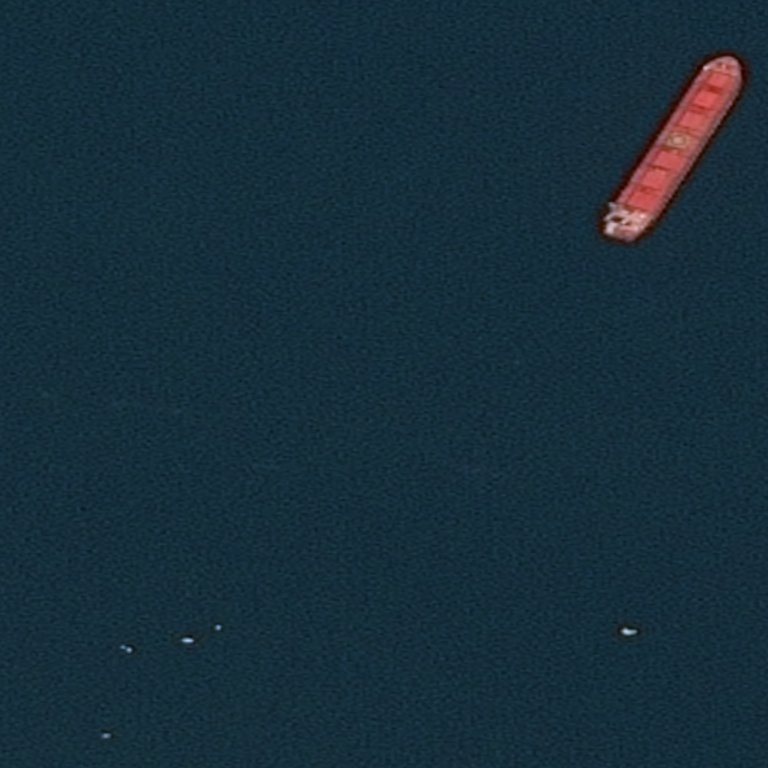

In [5]:
result["0c0d90d8d.jpg"]["sahi_scaled_down_image"]

In [ ]:
from PIL import Image
import numpy as np
from imageutils import resize_img

factor = 3
image_path = r"D:\NLP 1\Sat_object_detection\inference_images\2.jpg"
image = Image.open(image_path)
w, h= image.size
resized_img = resize_img(image, h/factor, w/factor)

In [ ]:
image.dra

In [ ]:
resized_img = Image.fromarray(np.uint8(resized_img)).convert('RGB')


In [ ]:
resized_img.show()

In [ ]:
from os import listdir
for filename in listdir(images_path):
    print(filename)

03a75a583.jpg
08229754b.jpg
08229754b_pred.jpg
08229754b_pred_pred.jpg
0b7359c38.jpg
0b7359c38_pred.jpg
0c0d90d8d.jpg
0e40b3a5b.jpg
1.jpg
12572286c.jpg
14013864b.jpg
1d0f400ee.jpg
1_2.jpg
2.jpg
2cb5d47a2.jpg
2d1b074cb.jpg
2ec80a085.jpg
2f444438d.jpg
2_2.jpg
3b3ed2440.jpg
7221420a5.jpg
7242578f3.jpg
7272882ed.jpg
7619476c2.jpg
7787381d4.jpg
7937980e1.jpg
8117518d5.jpg
8166432c8.jpg
8316753c8.jpg
8591865ee.jpg
8752531aa.jpg
8814042e0.jpg
8849749b2.jpg
9196798a9.jpg
9279279fa.jpg
9454131fb.jpg
9842324d3.jpg
9915044cb.jpg
9996921bf.jpg
df648f2f4.jpg
df82736fc.jpg
dfdfc012a.jpg
dfe1d30a7.jpg
dff7a31fc.jpg
e0b6f0185.jpg
e3adcb329.jpg
e3da55562.jpg
e7dfaf709.jpg
e7e24507a.jpg
e7e2c2aa6.jpg
Predictions_1402_7_20-11;12
Predictions_1402_7_20-11;20
Predictions_1402_7_20-11;24


In [ ]:
import glob
import os

folder_path = images_path
for filename in glob.iglob(folder_path + '/*'):
    file_path = os.path.join(folder_path, filename)
    # Do something with the file
    print(filename)

D:\NLP 1\Sat_object_detection\debug_images_2\03a75a583.jpg
D:\NLP 1\Sat_object_detection\debug_images_2\08229754b.jpg
D:\NLP 1\Sat_object_detection\debug_images_2\08229754b_pred.jpg
D:\NLP 1\Sat_object_detection\debug_images_2\08229754b_pred_pred.jpg
D:\NLP 1\Sat_object_detection\debug_images_2\0b7359c38.jpg
D:\NLP 1\Sat_object_detection\debug_images_2\0b7359c38_pred.jpg
D:\NLP 1\Sat_object_detection\debug_images_2\0c0d90d8d.jpg
D:\NLP 1\Sat_object_detection\debug_images_2\0e40b3a5b.jpg
D:\NLP 1\Sat_object_detection\debug_images_2\1.jpg
D:\NLP 1\Sat_object_detection\debug_images_2\12572286c.jpg
D:\NLP 1\Sat_object_detection\debug_images_2\14013864b.jpg
D:\NLP 1\Sat_object_detection\debug_images_2\1d0f400ee.jpg
D:\NLP 1\Sat_object_detection\debug_images_2\1_2.jpg
D:\NLP 1\Sat_object_detection\debug_images_2\2.jpg
D:\NLP 1\Sat_object_detection\debug_images_2\2cb5d47a2.jpg
D:\NLP 1\Sat_object_detection\debug_images_2\2d1b074cb.jpg
D:\NLP 1\Sat_object_detection\debug_images_2\2ec80a085.jpg

In [ ]:
import os

directory = images_path

for root, dirs, files in os.walk(directory):
    # if root == directory:
        # for filename in files:
        print(root)
        print(dirs)
        print(files)
        break
            # print(os.path.join(root, filename))

D:\NLP 1\Sat_object_detection\debug_images_2
['Predictions_1402_7_20-11;12', 'Predictions_1402_7_20-11;20', 'Predictions_1402_7_20-11;24']
['03a75a583.jpg', '08229754b.jpg', '08229754b_pred.jpg', '08229754b_pred_pred.jpg', '0b7359c38.jpg', '0b7359c38_pred.jpg', '0c0d90d8d.jpg', '0e40b3a5b.jpg', '1.jpg', '12572286c.jpg', '14013864b.jpg', '1d0f400ee.jpg', '1_2.jpg', '2.jpg', '2cb5d47a2.jpg', '2d1b074cb.jpg', '2ec80a085.jpg', '2f444438d.jpg', '2_2.jpg', '3b3ed2440.jpg', '7221420a5.jpg', '7242578f3.jpg', '7272882ed.jpg', '7619476c2.jpg', '7787381d4.jpg', '7937980e1.jpg', '8117518d5.jpg', '8166432c8.jpg', '8316753c8.jpg', '8591865ee.jpg', '8752531aa.jpg', '8814042e0.jpg', '8849749b2.jpg', '9196798a9.jpg', '9279279fa.jpg', '9454131fb.jpg', '9842324d3.jpg', '9915044cb.jpg', '9996921bf.jpg', 'df648f2f4.jpg', 'df82736fc.jpg', 'dfdfc012a.jpg', 'dfe1d30a7.jpg', 'dff7a31fc.jpg', 'e0b6f0185.jpg', 'e3adcb329.jpg', 'e3da55562.jpg', 'e7dfaf709.jpg', 'e7e24507a.jpg', 'e7e2c2aa6.jpg']


In [ ]:
tuple(map(int, (2.51, 3.75)))

(2, 3)

In [2]:
import random

In [6]:
random.randint(0,12)

1